In [1]:
import numpy as np
import matplotlib.pyplot as plt

# オープンループをプロット

In [2]:
# Loading Open loop transfer function Data
freq1,a1,a2,a3,a4,Mg1,phi1 = np.loadtxt('1_30hz_Channels.csv',delimiter=",",unpack=True)
freq2,a5,a6,a7,a8,Mg2,phi2 = np.loadtxt('10_100hz_Channels.csv',delimiter=",",unpack=True)
freq3,aa,ab,av,ac,Mg3,phi3 = np.loadtxt('50_10khz_Channels.csv',delimiter=",",unpack=True)


(-180, 180)

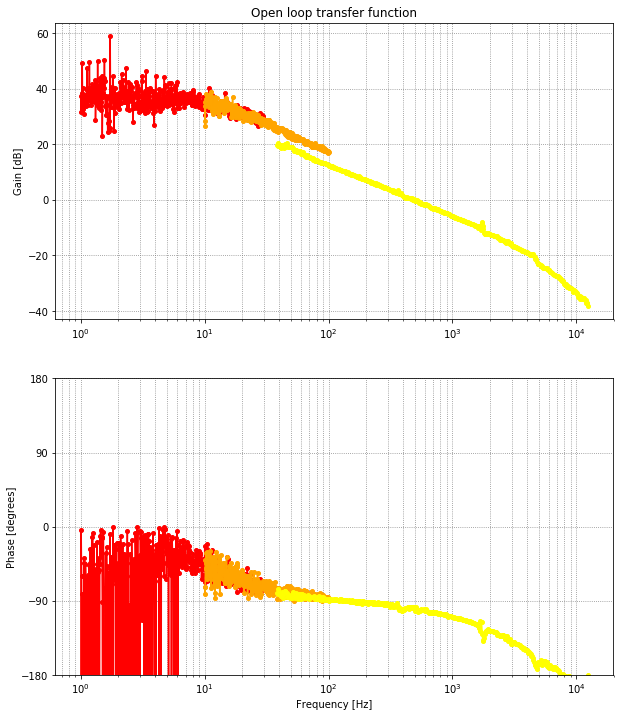

In [18]:
# Plotting Gain
#fig1 = plt.figure(num=1, figsize=(10, 12))
plt.subplot(2,1,1)

plt.semilogx(freq1, Mg1,color='Red',
             marker='.', markersize=8)
plt.semilogx(freq2, Mg2,color='Orange',
             marker='.', markersize=8)
plt.semilogx(freq3, Mg3,color='Yellow',
             marker='.', markersize=8)

plt.title(r'Open loop transfer function')
plt.ylabel(r'Gain [dB]')
plt.grid(which='major',color='gray',linestyle=':')
plt.grid(which='minor',color='gray',linestyle=':')

# Plotting Phase
plt.subplot(2,1,2)
plt.semilogx(freq1, phi1-180,color='Red',
             marker='.', markersize=8)
plt.semilogx(freq2, phi2-180,color='Orange',
             marker='.', markersize=8)
plt.semilogx(freq3, phi3-180,color='Yellow',
             marker='.', markersize=8)
plt.grid(which='major',color='gray',linestyle=':')
plt.grid(which='minor',color='gray',linestyle=':')

#plt.title(r'Phase')
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Phase [degrees]')
tlabels = ['0', '-90','-180','-270','-360']

# You can specify y ticks
#plt.yticks([0, -90, -180, -270, -360], tlabels)
plt.yticks(np.arange(-180,181,90))
plt.ylim(-180, 180)

# Saving the plot in pdf and png
#plt.savefig('sample_plot.pdf')
#plt.savefig('sample_plot.png')

# Showing the plot
#plt.show()

# フィードバック信号をプロット

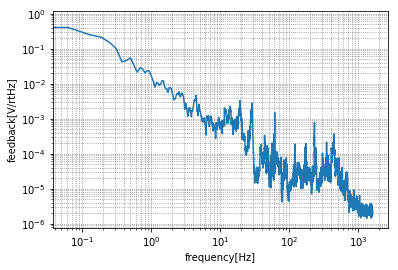

In [19]:
f_camp,a_camp = np.loadtxt('feedback.txt',unpack=True)

plt.ylabel(r'feedback[V/rtHz]')
plt.xlabel(r'frequency[Hz]')
plt.loglog(f_camp,a_camp)
#plt.show()
#plt.savefig('freq-feedback')
plt.grid(which='major',color='gray',linestyle=':')
plt.grid(which='minor',color='gray',linestyle=':')

## Calibrating the feedback [V] to displacement [m]

In [5]:
# Interferometer response

M = 8.90e6 #[m/V]

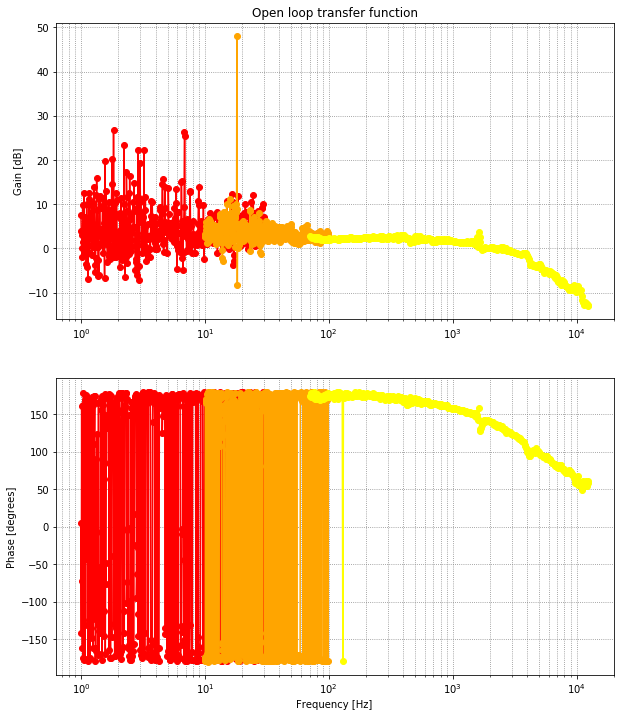

In [21]:
# Loading the actuator efficiency data

freq1,a1,a2,a3,a4,Mg_fb1,phi_fb1 = np.loadtxt('1_30hz_A_Channels.csv',delimiter=',',unpack=True)
freq2,a1,a2,a3,a4,Mg_fb2,phi_fb2 = np.loadtxt('10_100hz_A_Channels.csv',delimiter=',',unpack=True)
freq3,a1,a2,a3,a4,Mg_fb3,phi_fb3 = np.loadtxt('50_10khz_A_Channels.csv',delimiter=',',unpack=True)

# Plotting Gain
#fig1 = plt.figure(num=1, figsize=(10, 12))
plt.subplot(2,1,1)

plt.semilogx(freq1, Mg_fb1,color='Red', marker='.', markersize=12)
plt.semilogx(freq2, Mg_fb2,color='Orange', marker='.', markersize=12)
plt.semilogx(freq3, Mg_fb3,color='Yellow', marker='.', markersize=12)

plt.title(r'Open loop transfer function')
plt.ylabel(r'Gain [dB]')
plt.grid(which='major',color='gray',linestyle=':')
plt.grid(which='minor',color='gray',linestyle=':')

# Plotting Phase
plt.subplot(2,1,2)
plt.semilogx(freq1, phi_fb1,color='Red', marker='.', markersize=12)
plt.semilogx(freq2, phi_fb2,color='Orange',marker='.', markersize=12)
plt.semilogx(freq3, phi_fb3,color='Yellow',marker='.', markersize=12)

#plt.title(r'Phase')
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Phase [degrees]')
#tlabels = ['0', '-90','-180','-270','-360']
plt.grid(which='major',color='gray',linestyle=':')
plt.grid(which='minor',color='gray',linestyle=':')

# You can specify y ticks
#plt.yticks([0, -90, -180, -270, -360], tlabels)
#plt.ylim(-380, 5)

# Saving the plot in pdf and png
#plt.savefig('sample_plot.pdf')
#plt.savefig('sample_plot.png')

# Showing the plot
#plt.show()


In [7]:
# Converting dB to raw gain and take avarage

G_fb = 10**(Mg_fb3[181:403]/20)
G_avg = np.average(G_fb)
A = G_avg/M

print (A)

1.4303328548449568e-07


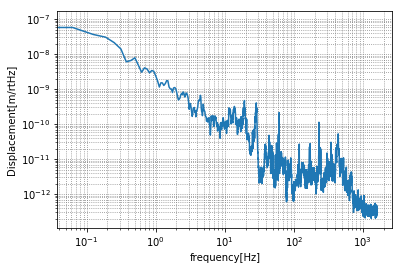

In [22]:
seis_camp=a_camp*1.430/10000000


plt.ylabel(r'Displacement[m/rtHz]')
plt.xlabel(r'frequency[Hz]')
plt.loglog(f_camp,seis_camp)
#plt.show()
#plt.savefig('freq-feedback')
plt.grid(which='major',color='gray',linestyle=':')
plt.grid(which='minor',color='gray',linestyle=':')

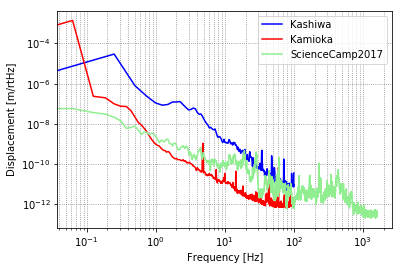

In [23]:
# Loading the seismic motion data at Kamioka and Kashiwa [m/rtHz]
#Plot all

f_seis_kashiwa = np.loadtxt('kashiwa_freq.txt',delimiter=',',unpack=True)
disp_seis_kashiwa = np.loadtxt('kashiwa_disp.txt',delimiter=',',unpack=True)
f_seis_kamioka = np.loadtxt('kamioka_freq.txt',delimiter=',',unpack=True)
disp_seis_kamioka = np.loadtxt('kamioka_disp.txt',delimiter=',',unpack=True)


plt.loglog(f_seis_kashiwa, disp_seis_kashiwa,color='blue',label='Kashiwa')
plt.loglog(f_seis_kamioka, disp_seis_kamioka,color='red', label='Kamioka')
plt.loglog(f_camp, seis_camp,color='LightGreen', label='ScienceCamp2017')

# Labels
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Displacement [m/rtHz]')

# Saving the plot in pdf and png
#plt.savefig('sample_summary.pdf')
#plt.savefig('sample_summary.png')
plt.legend()
#plt.show()
plt.grid(which='major',color='gray',linestyle=':')
plt.grid(which='minor',color='gray',linestyle=':')